# Ad Click Prediction Classification

# 1. Problem Definition

How we can use various python based Machine Learning Model and the given parameters to predict if the customer purchased or not?

# 2. Data

Data from: https://www.kaggle.com/jahnveenarang/cvdcvd-vd

# 3. Evaluation

As this is a classification problem, we will use the classification metics for evauluting the model

# 4. Features

## inputs / features
    1. User ID - Customer Unique Id
    2. Gender - Gender of a customer - M/F
    3. Age - Age of a customer
    4. EstimatedSalary - Estimated salary of a customer

## Output / label
    5. Purchased - Whether they purchased or not after Ad click 1/0

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Reading the Dataset

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

## Data Exporation

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
len(df['User ID'].unique())

400

As User ID is based on the customer ID and is unique by customer, we will drop the User ID

In [6]:
df = df.drop('User ID', axis=1)

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


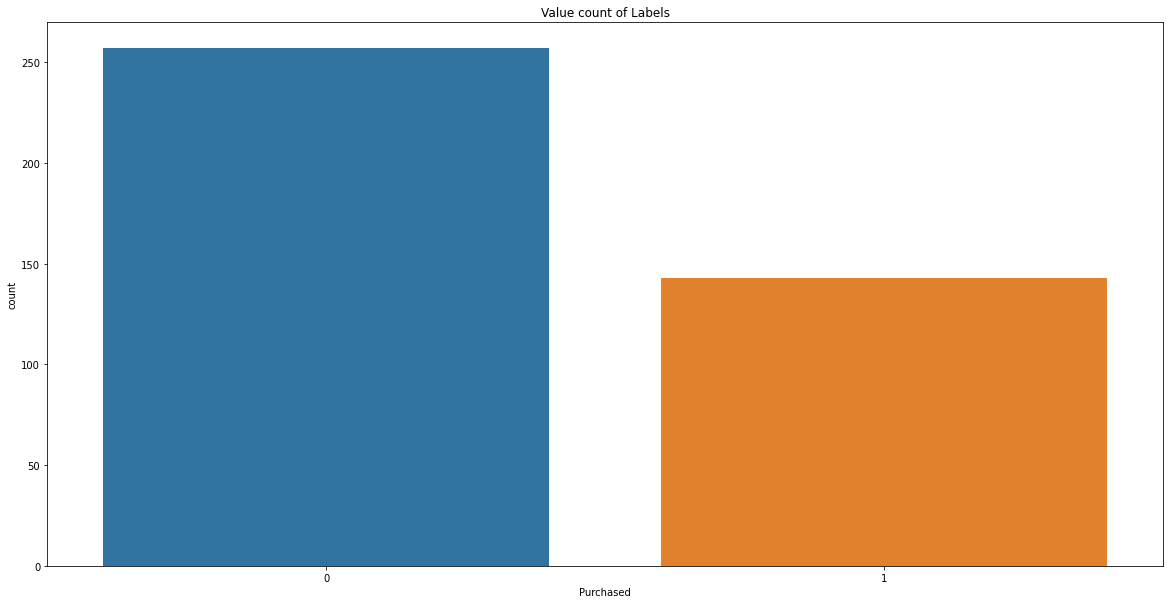

In [8]:
plt.figure(figsize=(20,10))
plt.title('Value count of Labels')
sns.countplot(data=df, x='Purchased');

As we can see the data is in-balanced

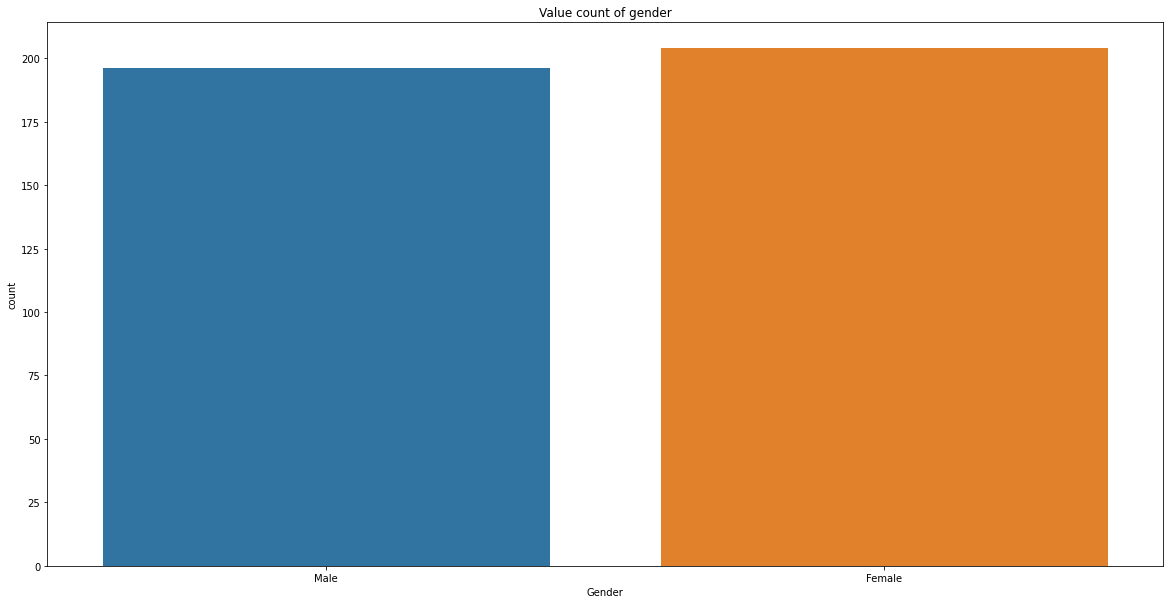

In [9]:
plt.figure(figsize=(20,10))
plt.title('Value count of gender')
sns.countplot(data=df, x='Gender');

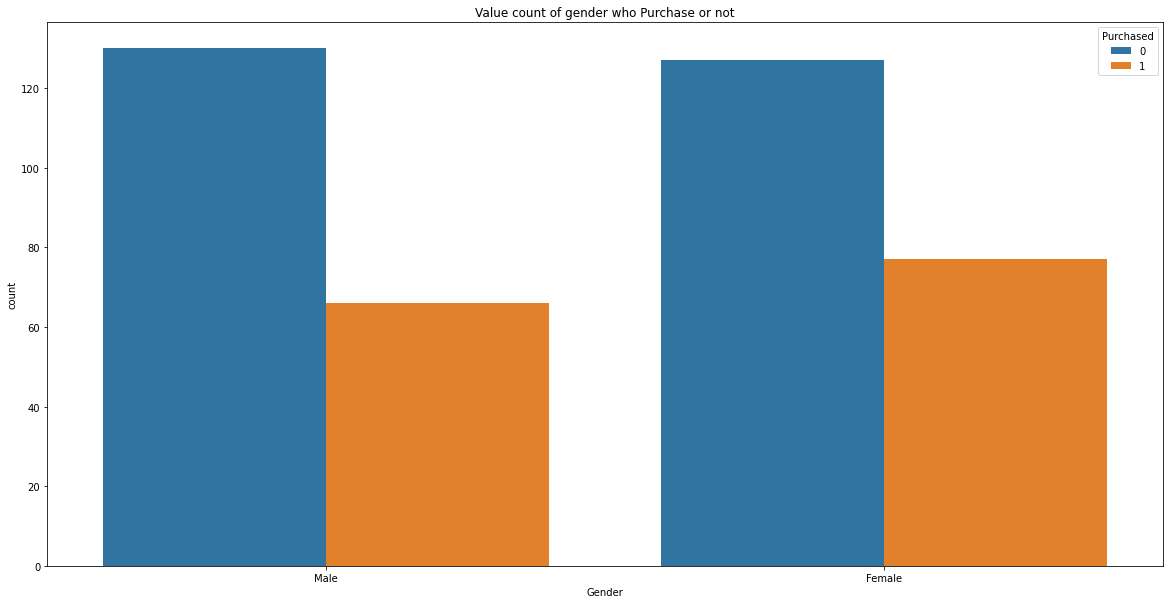

In [10]:
plt.figure(figsize=(20,10))
plt.title('Value count of gender who Purchase or not')
sns.countplot(data=df, x='Gender', hue='Purchased');

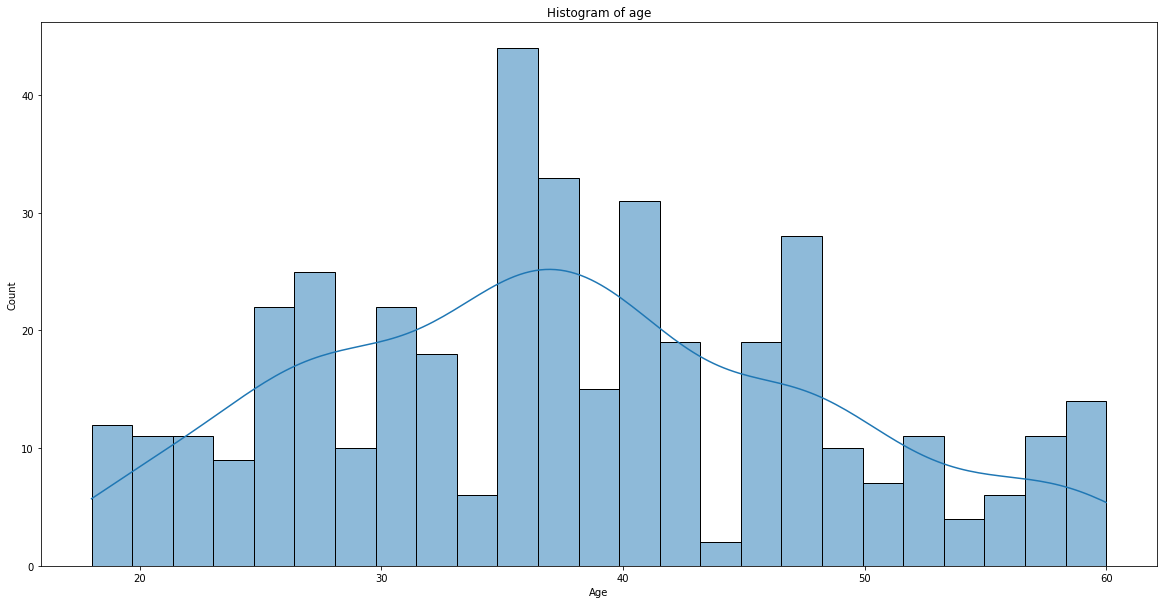

In [11]:
plt.figure(figsize=(20,10))
plt.title('Histogram of age')
sns.histplot(data=df, x='Age', bins=25, kde=True);

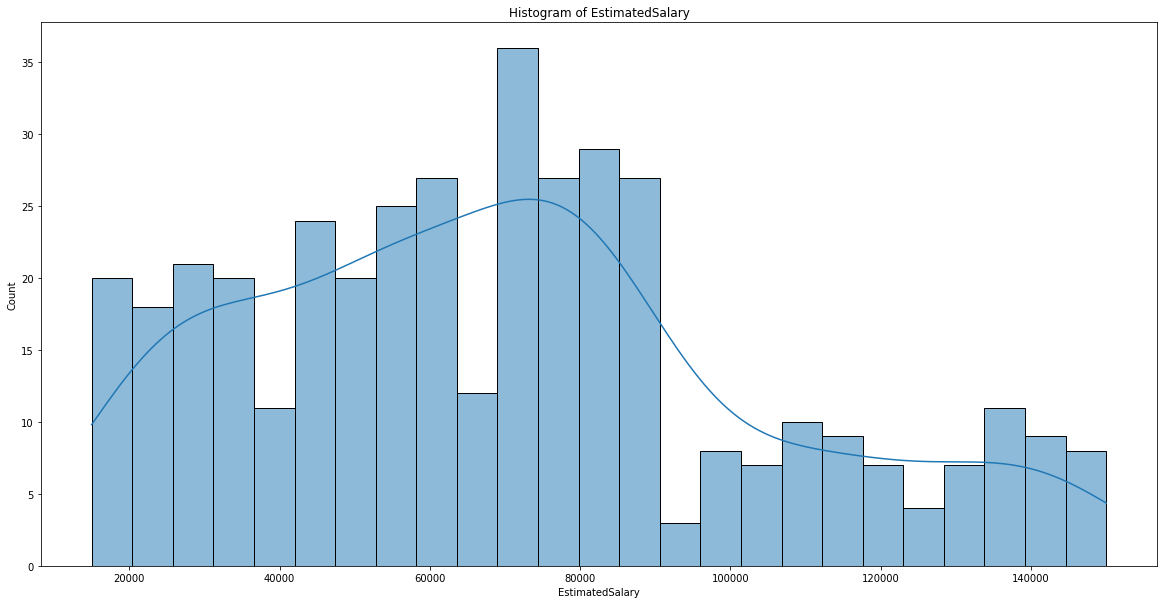

In [12]:
plt.figure(figsize=(20,10))
plt.title('Histogram of EstimatedSalary')
sns.histplot(data=df, x='EstimatedSalary', bins=25, kde=True);

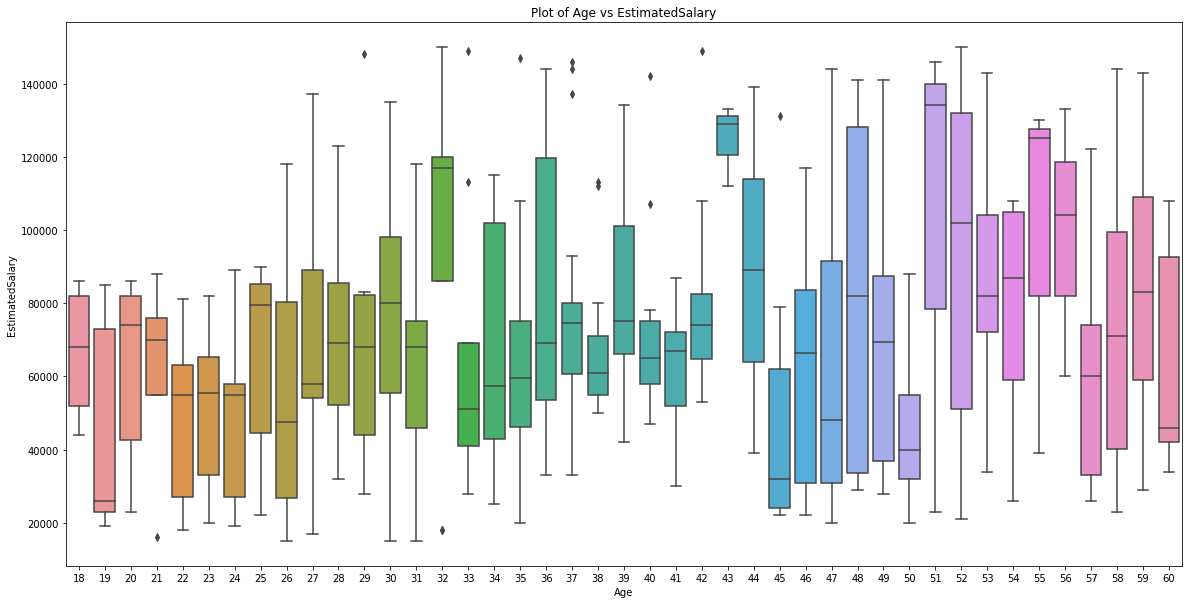

In [13]:
plt.figure(figsize=(20,10))
plt.title('Plot of Age vs EstimatedSalary')
sns.boxplot(data=df, x='Age', y='EstimatedSalary');

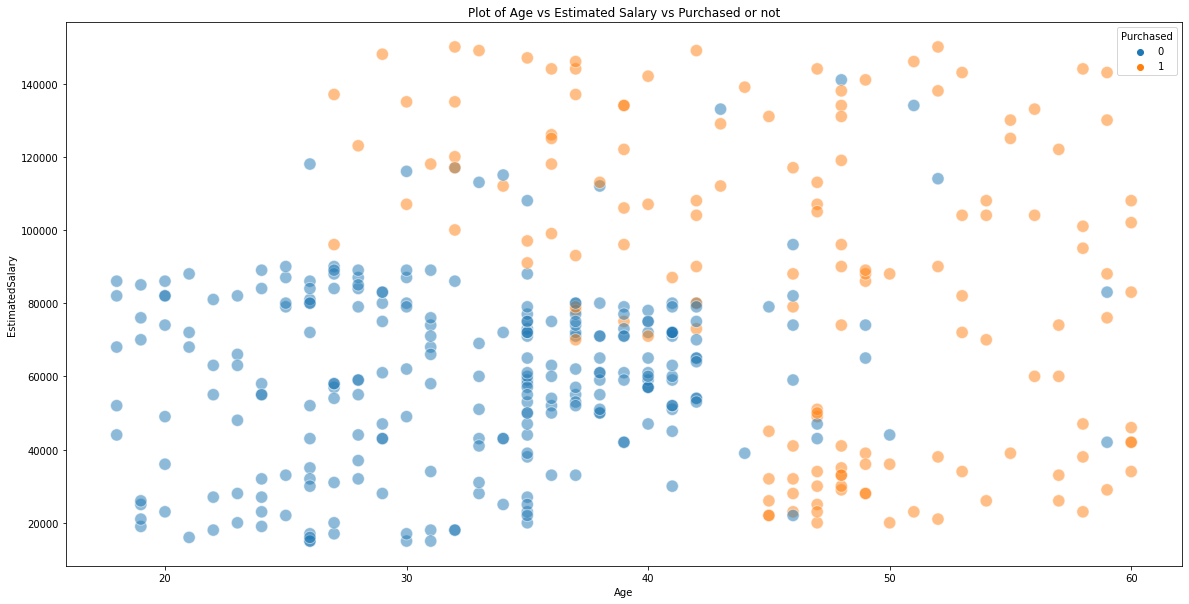

In [14]:
plt.figure(figsize=(20,10))
plt.title('Plot of Age vs Estimated Salary vs Purchased or not')
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', s=150, alpha=0.5);

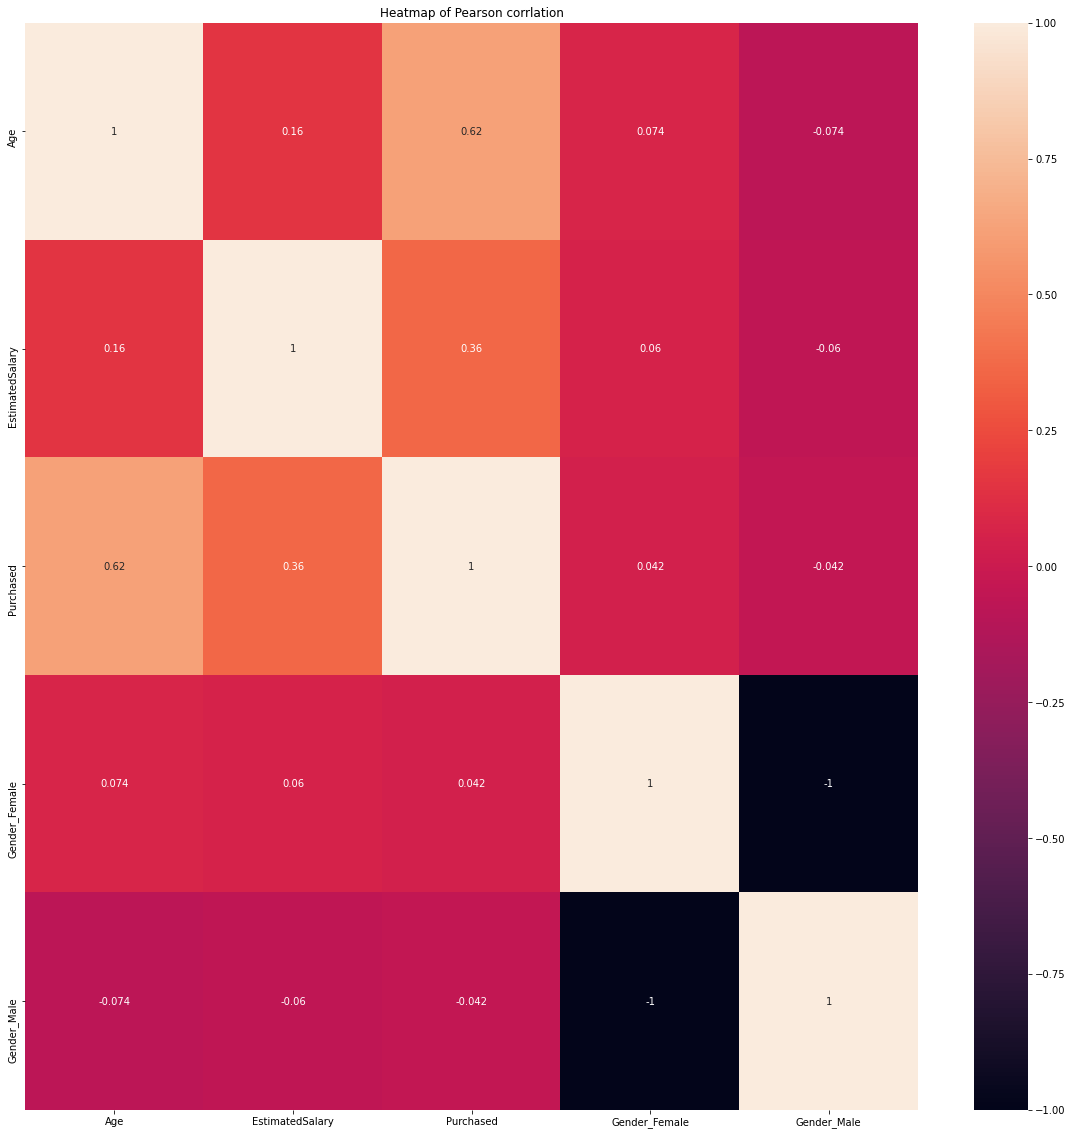

In [15]:
plt.figure(figsize=(20,20))
plt.title('Heatmap of Pearson corrlation')
sns.heatmap(data=(pd.get_dummies(df)).corr(),annot=True);

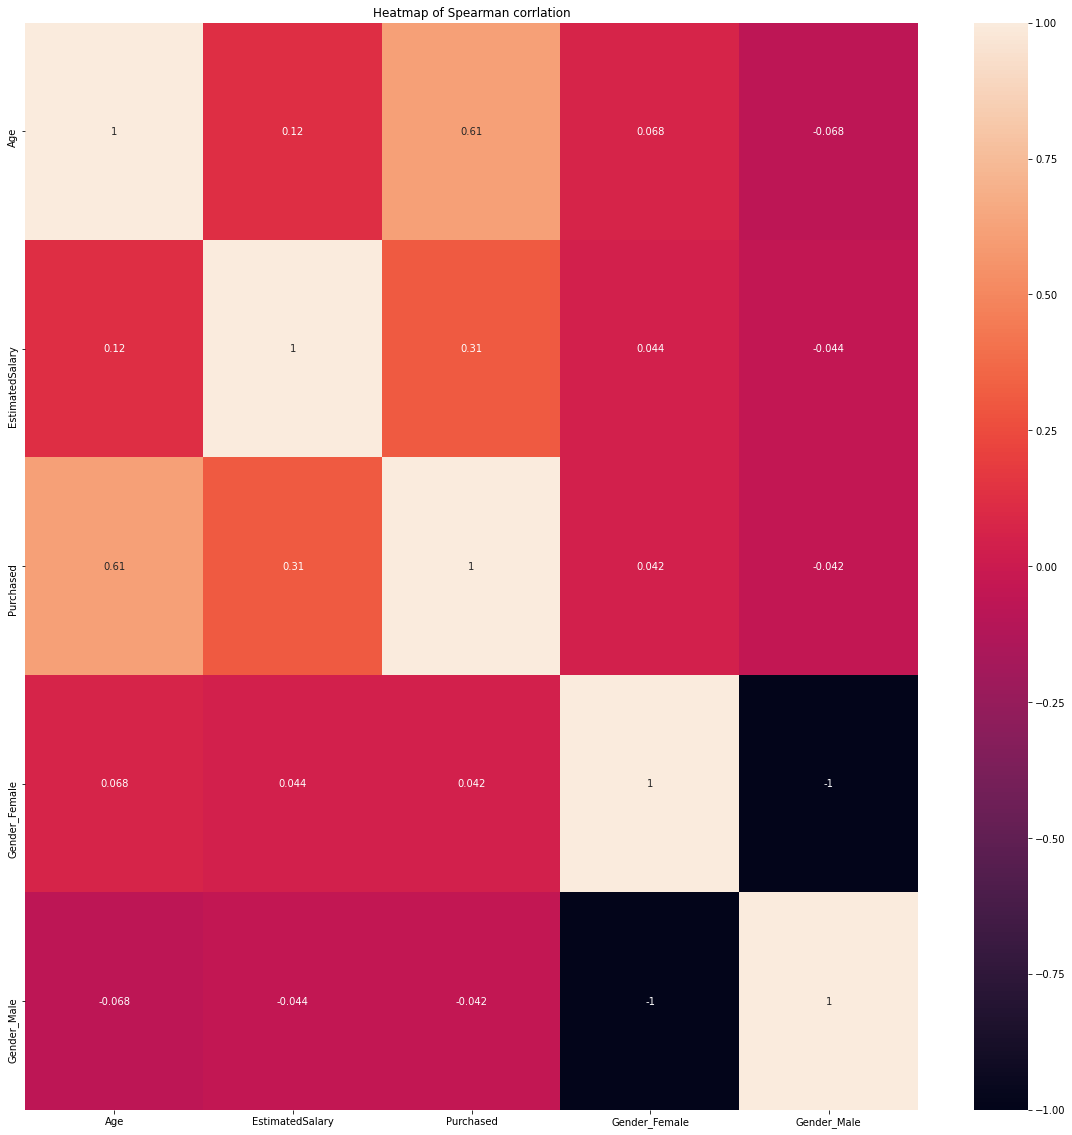

In [16]:
plt.figure(figsize=(20,20))
plt.title('Heatmap of Spearman corrlation')
sns.heatmap(data=(pd.get_dummies(df)).corr('spearman'),annot=True);

# 5. Modelling

In [17]:
X = df.drop('Purchased', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Purchased']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Imports

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

## Baseline Model Scores

In [23]:
from warnings import filterwarnings

In [24]:
filterwarnings('ignore')

In [25]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [26]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'XGBRFClassifier': XGBRFClassifier(),
          'LGBMClassifier':LGBMClassifier()}

In [27]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [28]:
baseline_model_scores

,Score
DecisionTreeClassifier,0.841667
LogisticRegression,0.858333
RandomForestClassifier,0.900000
AdaBoostClassifier,0.908333
LGBMClassifier,0.908333
KNeighborsClassifier,0.916667
GradientBoostingClassifier,0.916667
SVC,0.933333
XGBClassifier,0.933333
XGBRFClassifier,0.933333


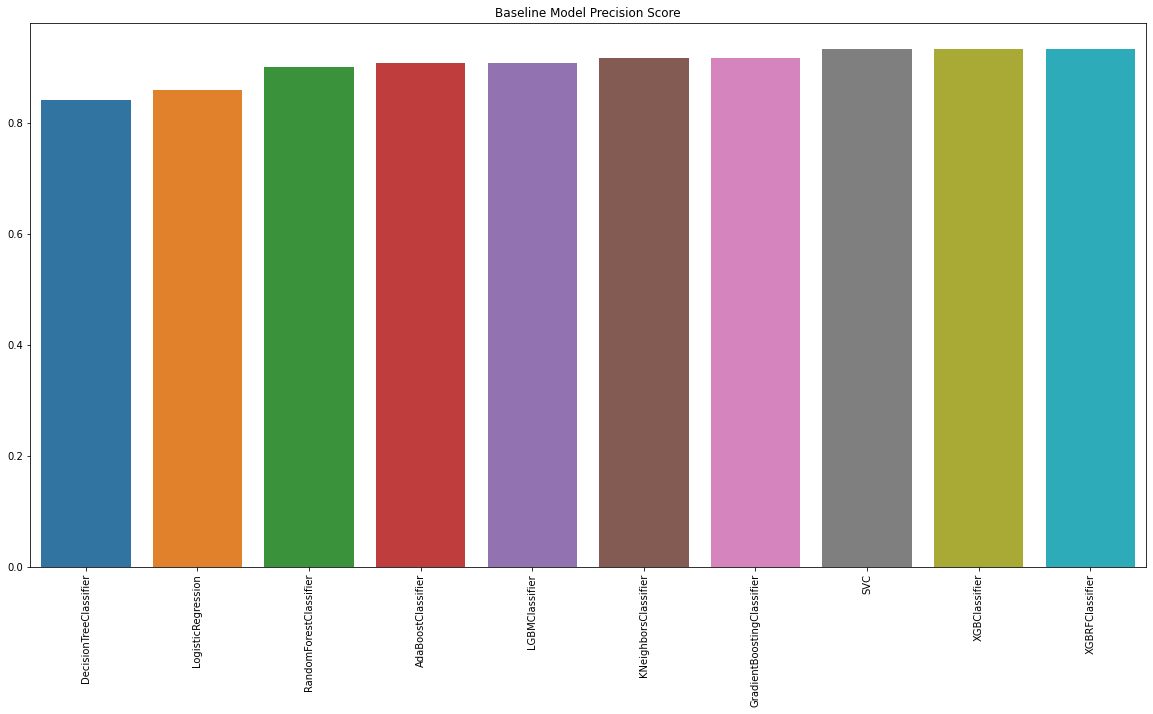

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

From the baseline modelling we can see that the top models are:
1. SVC 	0.933333
1. XGBRFClassifier 	0.933333

we can try tuning the hyperparams to check if the model improves

## Random Search CV

As the data is in-balance we will use the F1 scores for the scoring 

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                      scoring='f1',
                                      cv=5,
                                     n_iter=20,n_jobs=1,
                                     verbose=0)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [32]:
models = {'SVC': SVC(),
         'XGBRFClassifier': XGBRFClassifier()}

params = {'SVC':{'C' : np.linspace(0.1,0.9, 9),
                'kernel':['linear', 'ploy', 'rbf', 'sigmoid'],
                'gamma': np.linspace(0,1,11),
                },
          'XGBRFClassifier':{'n_estimators': [2,5,10,20,50,100,200],
                             'learning_rate':np.linspace(0,1,11),
                             'gamma': np.linspace(0,1,11)}
         }

### RS model 1

In [33]:
model_rs_scores_1, model_rs_best_param_1 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

In [34]:
model_rs_scores_1

{'SVC': 0.9166666666666666, 'XGBRFClassifier': 0.9183673469387754}

In [35]:
model_rs_best_param_1

{'SVC': {'C': 0.6, 'gamma': 0.7000000000000001, 'kernel': 'rbf'},
 'XGBRFClassifier': {'gamma': 0.30000000000000004,
  'learning_rate': 0.1,
  'n_estimators': 5}}

From the random search CV of 5, we found that the SVC model perfroms the best with a CV F1 mean score of 91.67%
we will based the model evalution on the SVC.

# 6. Model Evalution

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [37]:
model = SVC(kernel='rbf',
            gamma=0.7,
            C = 0.6)

In [38]:
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

## Classification Report

In [39]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



## Confustion Matrix

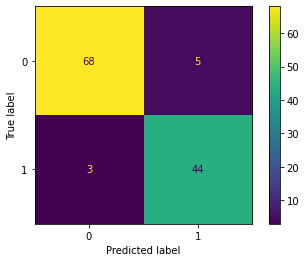

In [40]:
plot_confusion_matrix(model,X_test,y_test)

## ROC Curve

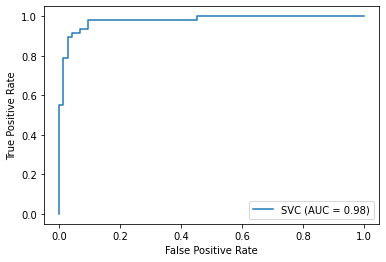

In [41]:
plot_roc_curve(model,X_test,y_test)

## Evalution using cross-validation

In [42]:
def get_cv_score(model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(model,X,y,cv=5,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(model,X,y,cv=5,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(model,X,y,cv=5,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(model,X,y,cv=5,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [43]:
cv_merics = get_cv_score(model, X_train, y_train, cv=5)

Cross Validaion accuracy Scores: [0.92857143 0.94642857 0.89285714 0.83928571 0.91071429]
Cross Validation accuracy Mean Score: 0.9035714285714287
Cross Validaion precision Scores: [0.85714286 0.94444444 0.84210526 0.70833333 0.85714286]
Cross Validation precision Mean Score: 0.8418337510442774
Cross Validaion recall Scores: [0.94736842 0.89473684 0.84210526 0.89473684 0.9       ]
Cross Validation recall Mean Score: 0.8957894736842105
Cross Validaion f1 Scores: [0.9        0.91891892 0.84210526 0.79069767 0.87804878]
Cross Validation f1 Mean Score: 0.8659541273966447


In [44]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.903571,0.841834,0.895789,0.895789


With the SVC model, we are able to get the following:

    Accuracy 	0.903571 
    Precision 	0.841834
    Recall 	    0.895789
    f1          0.895789
	 	 	